c:\Users\ileti\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ileti\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


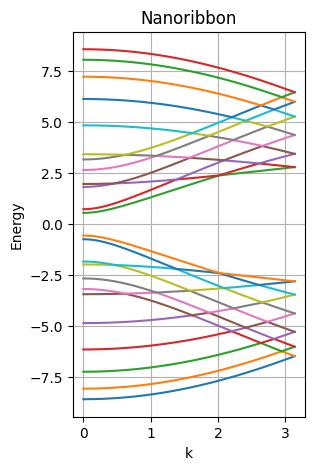

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
a = 1
n = 12
# n = n + 2 similar to DFT with that
kpts = np.linspace(0, np.pi/a, 1000)
t = -2.7
te = -2.7 * 1.12

def energy(k):
    D = np.zeros((2 * n, 2 * n), dtype=complex)
    for i in range(2*n):
        for j in range(2*n):
            if j % 2 != 0 and j == i + 1:
                D[i, j] = t
            elif j % 2 == 0 and j == i + 1:
                D[i, j] = te
            elif j % 2 != 0 and j == i + 3: 
                D[i, j] = te * np.exp(-1j * k * a)
            elif i % 2 == 0 and i == j + 1:
                D[i, j] = te
            elif i % 2 != 0  and i == j + 3:
                D[i, j] = te * np.exp(1j * k * a)
            elif i % 2 != 0  and i == j + 1:
                D[i, j] = t
    E, v = np.linalg.eig(D)
    return np.sort(E)


E = []
for k in kpts:
    E.append(energy(k))
E = np.array(E)


plt.figure(figsize=(3, 5))
plt.plot(kpts, E)
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Nanoribbon')
plt.grid(True)
plt.show()
